# Spaceship Titanic

## Feature Engineering

## Table of Contents
- [Spaceship Titanic](#spaceship-titanic)
- [Feature Engineering](#feature-engineering)
- [Table of Contents](#table-of-contents)
- [Dependencies](#dependencies)
- [Config](#config)
- [Data Extraction](#data-extraction)
- [Dataset Feature Engineering](#dataset-feature-engineering)
    - [Drop Columns](#drop-columns)
    - [Fill Missing Columns](#fill-missing-columns)
    - [Drop Non-encoded Catagorical Columns](#drop-non-encoded-catagorical-columns)
    - [Reduce Dimensionality](#reduce-dimensionality)
    - [Correlation Heatmap](#correlation-heatmap)
- [Conclusions](#conclusions)
- [Save Transformed Datasets](#save-transformed-datasets)

### Dependencies

In [34]:
%conda install pandas numpy matplotlib seaborn scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
import sys
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

sys.path.insert(0, '../helpers')

from fill_na_with_mean_or_mode import fill_na_with_mean_or_mode
from one_hot_encode_columns import one_hot_encode_columns
from one_hot_encode_std_buckets import one_hot_encode_std_buckets

### Config

Set up directory variables.

In [36]:
dataset = "spaceship-titanic"
dataset_directory = f"../../datasets/{dataset}"
training_dataset_directory = f"{dataset_directory}/train.csv"
test_dataset_directory = f"{dataset_directory}/test.csv"

transformed_dataset_directory = "./transformed-data"
transformed_training_X_dataset_directory = f"{transformed_dataset_directory}/train_X.csv"
transformed_training_y_dataset_directory = f"{transformed_dataset_directory}/train_y.csv"
transformed_test_X_dataset_directory = f"{transformed_dataset_directory}/test_X.csv"

Pandas display configuration.

In [37]:
pd.options.display.max_columns=100

### Data Extraction

In [38]:
spaceship_titanic_train_dataframes = pd.read_csv(training_dataset_directory)
spaceship_titanic_train_dataframes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
spaceship_titanic_test_dataframes = pd.read_csv(test_dataset_directory)
spaceship_titanic_test_dataframes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Dataset Feature Engineering
##### Drop Columns

In [40]:
spaceship_titanic_train_dataframes.drop(['PassengerId'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['Name'], axis=1, inplace=True)
# spaceship_titanic_train_dataframes.drop(['Cabin'], axis=1, inplace=True)

In [41]:
passenger_ids = spaceship_titanic_test_dataframes['PassengerId'].values.reshape(-1, 1)
spaceship_titanic_test_dataframes.drop(['PassengerId'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Name'], axis=1, inplace=True)
# spaceship_titanic_test_dataframes.drop(['Cabin'], axis=1, inplace=True)

##### Fill Missing Columns

In [42]:
spaceship_titanic_train_dataframes.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [43]:
spaceship_titanic_test_dataframes.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [44]:
training_columns_with_na = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', \
    'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_columns_with_na = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', \
    'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

spaceship_titanic_train_dataframes = fill_na_with_mean_or_mode(dataframe=spaceship_titanic_train_dataframes, columns_to_fill=training_columns_with_na)
spaceship_titanic_test_dataframes = fill_na_with_mean_or_mode(dataframe=spaceship_titanic_test_dataframes, columns_to_fill=test_columns_with_na)

In [45]:
spaceship_titanic_train_dataframes.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [46]:
spaceship_titanic_test_dataframes.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

##### Encode Catagorical Data

Encode `Cabin` catagory to see if there is any correlation with `Transported`.

In [47]:
cabin_1 = []
cabin_2 = []
cabin_3 = []

cabins = spaceship_titanic_train_dataframes['Cabin']

for cabin in cabins:
    cabin_split = cabin.rsplit('/')
    cabin_1.append(cabin_split[0]) 
    cabin_2.append(cabin_split[1]) 
    cabin_3.append(cabin_split[2]) 

cabin_1 = pd.DataFrame(cabin_1, columns=['Cabin_1'])
cabin_2 = pd.DataFrame(cabin_2, columns=['Cabin_2'])
cabin_2 = cabin_2.astype('int')
cabin_3 = pd.DataFrame(cabin_3, columns=['Cabin_3'])

spaceship_titanic_train_dataframes = pd.concat([spaceship_titanic_train_dataframes, cabin_1 ], axis=1)
spaceship_titanic_train_dataframes = pd.concat([spaceship_titanic_train_dataframes, cabin_2 ], axis=1)
spaceship_titanic_train_dataframes = pd.concat([spaceship_titanic_train_dataframes, cabin_3 ], axis=1)

spaceship_titanic_train_dataframes.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [48]:
cabin_1 = []
cabin_2 = []
cabin_3 = []

cabins = spaceship_titanic_test_dataframes['Cabin']

for cabin in cabins:
    cabin_split = cabin.rsplit('/')
    cabin_1.append(cabin_split[0]) 
    cabin_2.append(cabin_split[1]) 
    cabin_3.append(cabin_split[2]) 

cabin_1 = pd.DataFrame(cabin_1, columns=['Cabin_1'])
cabin_2 = pd.DataFrame(cabin_2, columns=['Cabin_2'])
cabin_2 = cabin_2.astype('int')
cabin_3 = pd.DataFrame(cabin_3, columns=['Cabin_3'])

spaceship_titanic_test_dataframes = pd.concat([spaceship_titanic_test_dataframes, cabin_1 ], axis=1)
spaceship_titanic_test_dataframes = pd.concat([spaceship_titanic_test_dataframes, cabin_2 ], axis=1)
spaceship_titanic_test_dataframes = pd.concat([spaceship_titanic_test_dataframes, cabin_3 ], axis=1)

spaceship_titanic_test_dataframes.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [49]:
spaceship_titanic_train_dataframes.drop(['Cabin'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Cabin'], axis=1, inplace=True)

One hot encode remaining columns.

In [50]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

training_columns_to_encode = list(spaceship_titanic_train_dataframes.select_dtypes(include=['object', 'bool']).columns)
test_columns_to_encode = list(spaceship_titanic_test_dataframes.select_dtypes(include=['object', 'bool']).columns)

spaceship_titanic_train_dataframes = one_hot_encode_columns(one_hot_encoder=one_hot_encoder, dataframe=spaceship_titanic_train_dataframes, columns_to_encode=training_columns_to_encode)
spaceship_titanic_test_dataframes = one_hot_encode_columns(one_hot_encoder=one_hot_encoder, dataframe=spaceship_titanic_test_dataframes, columns_to_encode=test_columns_to_encode)

In [51]:
columns_to_encode = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

spaceship_titanic_train_dataframes = one_hot_encode_std_buckets(one_hot_encoder=one_hot_encoder, dataframe=spaceship_titanic_train_dataframes, \
    columns_to_encode=columns_to_encode, number_of_std_to_bucket=3, bucket_zero=True)
spaceship_titanic_test_dataframes = one_hot_encode_std_buckets(one_hot_encoder=one_hot_encoder, dataframe=spaceship_titanic_test_dataframes, \
    columns_to_encode=columns_to_encode, number_of_std_to_bucket=3, bucket_zero=True)

In [52]:
spaceship_titanic_train_dataframes.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Transported_False,Transported_True,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S,RoomService_is_zero,RoomService_std_1,RoomService_std_-1,RoomService_std_2,RoomService_std_-2,RoomService_std_3,RoomService_std_-3,FoodCourt_is_zero,FoodCourt_std_1,FoodCourt_std_-1,FoodCourt_std_2,FoodCourt_std_-2,FoodCourt_std_3,FoodCourt_std_-3,ShoppingMall_is_zero,ShoppingMall_std_1,ShoppingMall_std_-1,ShoppingMall_std_2,ShoppingMall_std_-2,ShoppingMall_std_3,ShoppingMall_std_-3,Spa_is_zero,Spa_std_1,Spa_std_-1,Spa_std_2,Spa_std_-2,Spa_std_3,Spa_std_-3,VRDeck_is_zero,VRDeck_std_1,VRDeck_std_-1,VRDeck_std_2,VRDeck_std_-2,VRDeck_std_3,VRDeck_std_-3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
spaceship_titanic_test_dataframes.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S,RoomService_is_zero,RoomService_std_1,RoomService_std_-1,RoomService_std_2,RoomService_std_-2,RoomService_std_3,RoomService_std_-3,FoodCourt_is_zero,FoodCourt_std_1,FoodCourt_std_-1,FoodCourt_std_2,FoodCourt_std_-2,FoodCourt_std_3,FoodCourt_std_-3,ShoppingMall_is_zero,ShoppingMall_std_1,ShoppingMall_std_-1,ShoppingMall_std_2,ShoppingMall_std_-2,ShoppingMall_std_3,ShoppingMall_std_-3,Spa_is_zero,Spa_std_1,Spa_std_-1,Spa_std_2,Spa_std_-2,Spa_std_3,Spa_std_-3,VRDeck_is_zero,VRDeck_std_1,VRDeck_std_-1,VRDeck_std_2,VRDeck_std_-2,VRDeck_std_3,VRDeck_std_-3
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


##### Drop Non-encoded Catagorical Columns

In [54]:
spaceship_titanic_train_dataframes.drop(['HomePlanet'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['Destination'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['CryoSleep'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['VIP'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['Cabin_1'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['Cabin_3'], axis=1, inplace=True)
spaceship_titanic_train_dataframes.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [55]:
spaceship_titanic_test_dataframes.drop(['HomePlanet'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Destination'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['CryoSleep'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['VIP'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Cabin_1'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Cabin_3'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

##### Correlation Heatmap

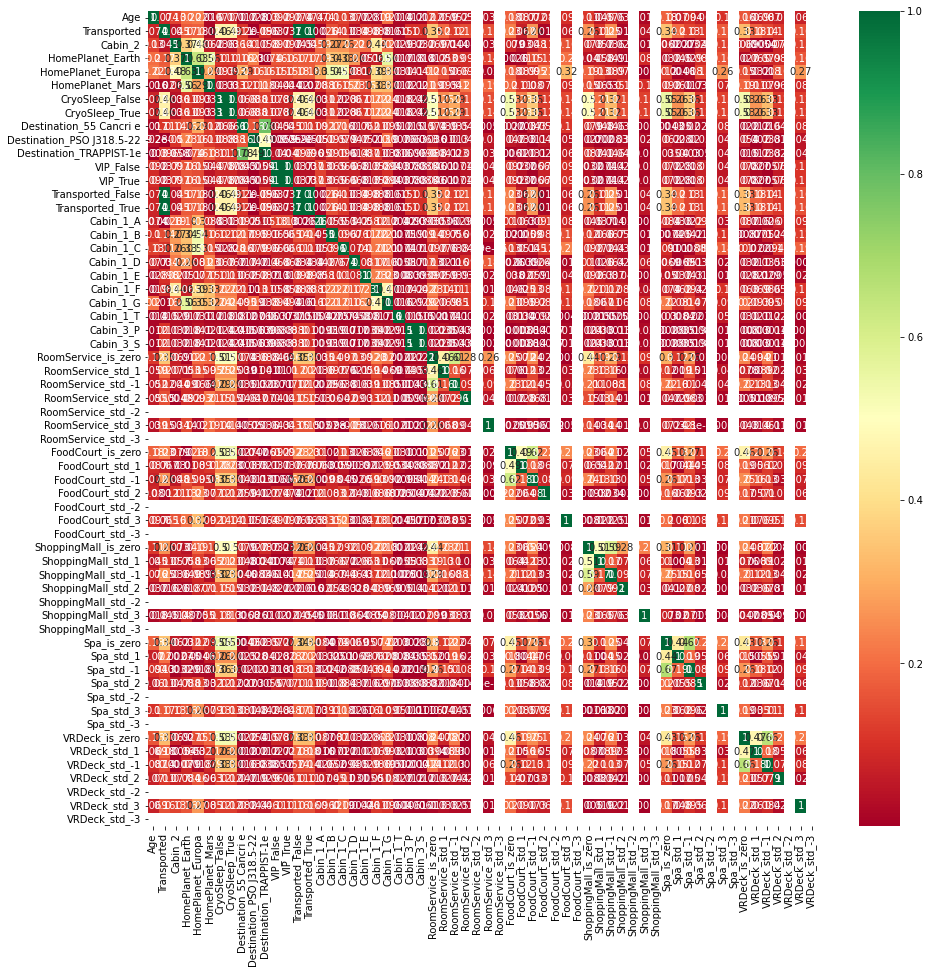

In [56]:
corr = spaceship_titanic_train_dataframes.corr()
corr = corr.apply(abs)
plt.figure(figsize=(15,15))
map = sns.heatmap(corr,annot=True,cmap="RdYlGn")

#### Drop Low Correlation Columns

In [57]:
spaceship_titanic_train_dataframes.drop(['Age', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',\
    'VIP_True', 'VIP_False', 'HomePlanet_Mars', 'RoomService_std_-2', 'RoomService_std_-3', 'FoodCourt_std_-2', 'FoodCourt_std_-3',\
         'ShoppingMall_std_-2', 'ShoppingMall_std_-3', 'Spa_std_-2', 'Spa_std_-3', 'VRDeck_std_-2', 'VRDeck_std_-3'], axis=1, inplace=True)
spaceship_titanic_test_dataframes.drop(['Age', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',\
    'VIP_True', 'VIP_False', 'HomePlanet_Mars', 'RoomService_std_-2', 'RoomService_std_-3', 'FoodCourt_std_-2', 'FoodCourt_std_-3',\
         'ShoppingMall_std_-2', 'ShoppingMall_std_-3', 'Spa_std_-2', 'Spa_std_-3', 'VRDeck_std_-2', 'VRDeck_std_-3'], axis=1, inplace=True)

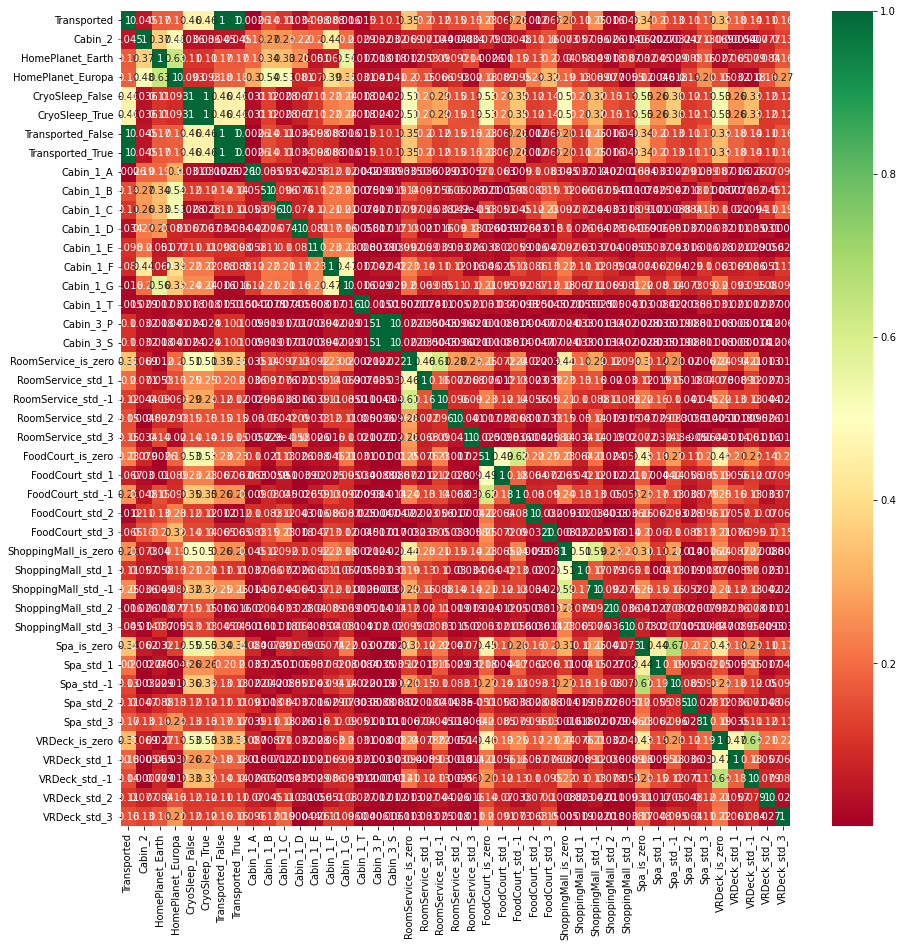

In [58]:
corr = spaceship_titanic_train_dataframes.corr()
corr = corr.apply(abs)
plt.figure(figsize=(15,15))
map = sns.heatmap(corr,annot=True,cmap="RdYlGn")

#### Conclusions

#### Save Transformed Datasets

Write the y-training set to a .csv file.

In [59]:
y_train = spaceship_titanic_train_dataframes["Transported"]

y_train.to_csv(transformed_training_y_dataset_directory, index=False)

Drop `Transported` and `Transported`-related columns from training X set.

In [60]:
X_train = spaceship_titanic_train_dataframes.drop(['Transported'] ,axis=1, inplace=False)
X_train.drop(['Transported_True'] ,axis=1, inplace=True)
X_train.drop(['Transported_False'] ,axis=1, inplace=True)

Write the X-training and X-test sets to .csv files.

In [61]:
X_train.to_csv(transformed_training_X_dataset_directory, index=False)

passenger_ids = pd.DataFrame(passenger_ids, columns=["PassengerId"])
spaceship_titanic_test_dataframes = pd.concat([passenger_ids, spaceship_titanic_test_dataframes ], axis=1)

X_test = spaceship_titanic_test_dataframes
X_test.to_csv(transformed_test_X_dataset_directory, index=False)